# Prediction using supervised ML
predicting a student's score based on the hours of study

## Author: Girish Sharma

### importing all the required libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### reading the data from the url


In [20]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### checking the data type and non-null values

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### creating pairplots to check the relation between the variables


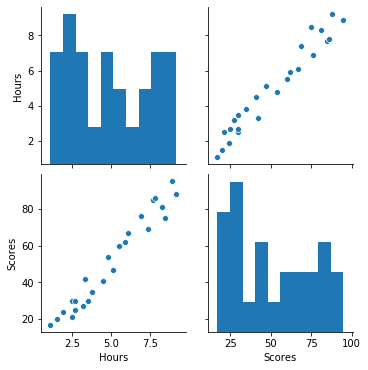

In [22]:
sns.pairplot(df)

### data preparation


In [23]:
x = df['Hours']
x = np.array(x)
x = x.reshape(-1,1)
y = df['Scores']
y = np.array(y)

### splitting the data into train and test

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

### training the model using linear regression

In [25]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### checking the intercept and coefficient

In [26]:
print(lm.intercept_, lm.coef_)

2.1024930747922284 [9.96651548]


### making predictions on test data

In [27]:
prediction = lm.predict(x_test)

### comparing the predicted and actual values


In [28]:
pd.DataFrame({'Predicted' : prediction, 'Actual' : y_test})

,Predicted,Actual
0,27.018782,30
1,78.844662,85
2,39.975252,35
3,75.854708,69
4,56.918328,60
5,49.941767,54
6,33.995343,27
7,86.817875,75


### Plotting Predicted vs Actual scores

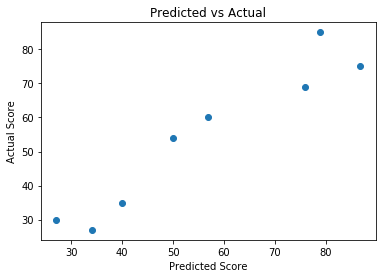

In [29]:
plt.title('Predicted vs Actual')  
plt.xlabel('Predicted Score')  
plt.ylabel('Actual Score')
plt.scatter(prediction,y_test)

### Checking the value of errors


In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 5.864954643694258
MSE: 41.63486564552886
RMSE: 6.452508476982333


### Calculating the score for 9.25 hours of study


In [33]:
hours=np.array(9.25).reshape(1,-1)
pred = lm.predict(hours)

print(f'If a student studies for {hours[0][0]} hours, then their predicted score is {pred[0]}')

If a student studies for 9.25 hours, then their predicted score is 94.29276125536512
